In [ ]:
%matplotlib inline


# Machine learning algorithms for classification


In [1]:

from ai4water.datasets import MtropicsLaos
from ai4water.experiments import MLClassificationExperiments
from ai4water.utils.utils import get_version_info

for lib, ver in get_version_info().items():
    print(lib, ver)


**********Tensorflow models could not be imported **********

python 3.8.12 | packaged by conda-forge | (default, Oct 12 2021, 21:19:05) [MSC v.1916 64 bit (AMD64)]
os nt
ai4water 1.06
easy_mpl 0.21.3
SeqMetrics 1.3.3
numpy 1.22.2
pandas 1.4.0
matplotlib 3.5.1
h5py 3.6.0
sklearn 1.2.1
xarray 0.21.1
netCDF4 1.5.8
seaborn 0.12.0


D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
dataset = MtropicsLaos(save_as_nc=True,  # if set to True, then netcdf must be installed
                       convert_to_csv=False,
                       path="F:\\data\\MtropicsLaos")



    Not downloading the data since the directory 
    F:\data\MtropicsLaos already exists.
    Use overwrite=True to remove previously saved files and download again


D:\mytools\AI4Water\ai4water\datasets\mtropics.py:907: UserWarning: preprocessing of shapefiles can not be done because no fiona installation is found.
  warnings.warn("preprocessing of shapefiles can not be done because no fiona installation is found.")


In [3]:
data =  dataset.make_classification(lookback_steps=1)

print(data.shape)

D:\mytools\AI4Water\ai4water\datasets\mtropics.py:576: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  return wl.loc[st:en], spm.loc[st:en]


(258, 9)


In [4]:
data.isna().sum()

air_temp        0
rel_hum         0
wind_speed      0
sol_rad         0
water_level     0
pcp             0
susp_pm         0
Ecoli_source    0
Ecoli_mpn100    0
dtype: int64

In [5]:
inputs = data.columns.tolist()[0:-1]
print(inputs)

['air_temp', 'rel_hum', 'wind_speed', 'sol_rad', 'water_level', 'pcp', 'susp_pm', 'Ecoli_source']


In [6]:
outputs = data.columns.tolist()[-1:]
print(outputs)

['Ecoli_mpn100']


In [7]:
exp = MLClassificationExperiments(
    input_features=inputs,
    output_features=outputs,
    save=False
)


In [8]:
exp.fit(data=data,
        exclude=['LinearDiscriminantAnalysis'])



***** Training *****
input_x shape:  (144, 8)
target shape:  (144, 1)
***** Validation *****
input_x shape:  (36, 8)
target shape:  (36, 1)
***** Test *****
input_x shape:  (78, 8)
target shape:  (78, 1)
running  AdaBoostClassifier model
running  BaggingClassifier model
running  BernoulliNB model
running  CalibratedClassifierCV model


D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:286: RuntimeWarning: invalid v

running  DecisionTreeClassifier model
running  DummyClassifier model


D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:286: RuntimeWarning: invalid value encountered in true_divide
  _precision =  TP / (TP + FP)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:356: RuntimeWarning: invalid value encountered in true_divide
  _f1_score = 2 * (precision * recall)  / (precision + recall)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:286: RuntimeWarning: invalid value encountered in true_divide
  _precision =  TP / (TP + FP)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:356: RuntimeWarning: invalid value encountered in true_divide
  _f1_score = 2 * (precision * recall)  / (precision + recall)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:286: RuntimeWarning: invalid value encountered in true_divide
  _precision =  TP / (TP + FP)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has

running  ExtraTreeClassifier model
running  ExtraTreesClassifier model


D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:286: RuntimeWarning: invalid value encountered in true_divide
  _precision =  TP / (TP + FP)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:356: RuntimeWarning: invalid value encountered in true_divide
  _f1_score = 2 * (precision * recall)  / (precision + recall)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:286: RuntimeWarning: invalid value encountered in true_divide
  _precision =  TP / (TP + FP)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:286: RuntimeWarning: invalid value encountered i

running  GaussianProcessClassifier model
running  GradientBoostingClassifier model


D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:286: RuntimeWarning: invalid value encountered in true_divide
  _precision =  TP / (TP + FP)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:356: RuntimeWarning: invalid value encountered in true_divide
  _f1_score = 2 * (precision * recall)  / (precision + recall)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:286: RuntimeWarning: invalid value encountered in true_divide
  _precision =  TP / (TP + FP)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:286: RuntimeWarning: invalid value encountered in true_divide
  _precision =  TP / (TP + FP)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:356: RuntimeWarning: invalid value encountered in true_divide
  _f1_score = 2 * (precision * recall)  / (precision + recall)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:286: RuntimeWarning: invalid value encountered in t

running  HistGradientBoostingClassifier model
running  KNeighborsClassifier model
running  LabelPropagation model
running  LabelSpreading model
running  LinearSVC model


D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:286: RuntimeWarning: invalid value encountered in true_divide
  _precision =  TP / (TP + FP)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:356: RuntimeWarning: invalid value encountered in true_divide
  _f1_score = 2 * (precision * recall)  / (precision + recall)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:286: RuntimeWarning: invalid value encountered in true_divide
  _precision =  TP / (TP + FP)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:286: RuntimeWarning: invalid value encountered in true_divide
  _precision =  TP / (TP + FP)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:356: RuntimeWarning: invalid value encountered in true_divide
  _f

running  LogisticRegression model


D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:286: RuntimeWarning: invalid value encountered in true_divide
  _precision =  TP / (TP + FP)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:356: RuntimeWarning: invalid value encountered in true_divide
  _f1_score = 2 * (precision * recall)  / (precision + recall)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:286: RuntimeWarning: invalid value encountered in true_divide
  _precision =  TP / (TP + FP)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:286: RuntimeWarning: invalid value encountered in true_divide
  _precision =  TP / (TP + FP)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:356: RuntimeWarning: invalid value encountered in true_divide
  _f1_score = 2 * (precision * recall)  / (precision + recall)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:286: RuntimeWarning: invalid value encountered in t

running  MLPClassifier model


D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:286: RuntimeWarning: invalid value encountered in true_divide
  _precision =  TP / (TP + FP)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:356: RuntimeWarning: invalid value encountered in true_divide
  _f1_score = 2 * (precision * recall)  / (precision + recall)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:286: RuntimeWarning: invalid value encountered in true_divide
  _precision =  TP / (TP + FP)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:286: RuntimeWarning: invalid value encountered in true_divide
  _precision =  TP / (TP + FP)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:356: RuntimeWarning: invalid value encountered in true_divide
  _f1_score = 2 * (precision * recall)  / (precision + recall)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:286: RuntimeWarning: invalid value encountered in t

running  NearestCentroid model


D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:286: RuntimeWarning: invalid value encountered in true_divide
  _precision =  TP / (TP + FP)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:356: RuntimeWarning: invalid value encountered in true_divide
  _f1_score = 2 * (precision * recall)  / (precision + recall)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:286: RuntimeWarning: invalid value encountered in true_divide
  _precision =  TP / (TP + FP)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:286: RuntimeWarning: invalid value encountered in true_divide
  _precision =  TP / (TP + FP)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:356: RuntimeWarning: invalid value encountered in true_divide
  _f1_score = 2 * (precision * recall)  / (precision + recall)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:286: RuntimeWarning: invalid value encountered in t

running  NuSVC model


D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:356: RuntimeWarning: invalid value encountered in true_divide
  _f1_score = 2 * (precision * recall)  / (precision + recall)


running  PassiveAggressiveClassifier model


D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:286: RuntimeWarning: invalid value encountered in true_divide
  _precision =  TP / (TP + FP)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:356: RuntimeWarning: invalid value encountered in true_divide
  _f1_score = 2 * (precision * recall)  / (precision + recall)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:286: RuntimeWarning: invalid value encountered in true_divide
  _precision =  TP / (TP + FP)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:286: RuntimeWarning: invalid value encountered in true_divide
  _precision =  TP / (TP + FP)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:356: RuntimeWarning: invalid value encountered in true_divide
  _f1_score = 2 * (precision * recall)  / (precision + recall)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:286: RuntimeWarning: invalid value encountered in t

running  Perceptron model


D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:286: RuntimeWarning: invalid value encountered in true_divide
  _precision =  TP / (TP + FP)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:356: RuntimeWarning: invalid value encountered in true_divide
  _f1_score = 2 * (precision * recall)  / (precision + recall)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:286: RuntimeWarning: invalid value encountered in true_divide
  _precision =  TP / (TP + FP)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:286: RuntimeWarning: invalid value encountered in true_divide
  _precision =  TP / (TP + FP)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:356: RuntimeWarning: invalid value encountered in true_divide
  _f1_score = 2 * (precision * recall)  / (precision + recall)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:286: RuntimeWarning: invalid value encountered in t

running  QuadraticDiscriminantAnalysis model
running  RandomForestClassifier model


D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


running  RidgeClassifier model


D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.46444e-32): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


running  RidgeClassifierCV model


D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:286: RuntimeWarning: invalid value encountered in true_divide
  _precision =  TP / (TP + FP)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:356: RuntimeWarning: invalid value encountered in true_divide
  _f1_score = 2 * (precision * recall)  / (precision + recall)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:286: RuntimeWarning: invalid value encountered in true_divide
  _precision =  TP / (TP + FP)


running  SGDClassifier model


D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:286: RuntimeWarning: invalid value encountered in true_divide
  _precision =  TP / (TP + FP)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:356: RuntimeWarning: invalid value encountered in true_divide
  _f1_score = 2 * (precision * recall)  / (precision + recall)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:286: RuntimeWarning: invalid value encountered in true_divide
  _precision =  TP / (TP + FP)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:286: RuntimeWarning: invalid value encountered in true_divide
  _precision =  TP / (TP + FP)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:356: RuntimeWarning: invalid value encountered in true_divide
  _f1_score = 2 * (precision * recall)  / (precision + recall)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:286: RuntimeWarning: invalid value encountered in t

running  SVC model


D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:286: RuntimeWarning: invalid value encountered in true_divide
  _precision =  TP / (TP + FP)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:356: RuntimeWarning: invalid value encountered in true_divide
  _f1_score = 2 * (precision * recall)  / (precision + recall)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:286: RuntimeWarning: invalid value encountered in true_divide
  _precision =  TP / (TP + FP)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:286: RuntimeWarning: invalid value encountered in true_divide
  _precision =  TP / (TP + FP)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:356: RuntimeWarning: invalid value encountered in true_divide
  _f1_score = 2 * (precision * recall)  / (precision + recall)
D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\SeqMetrics\_cls.py:286: RuntimeWarning: invalid value encountered in t

In [9]:

# Following plot is only available when we perform cross validation
# exp.plot_cv_scores(data=data)


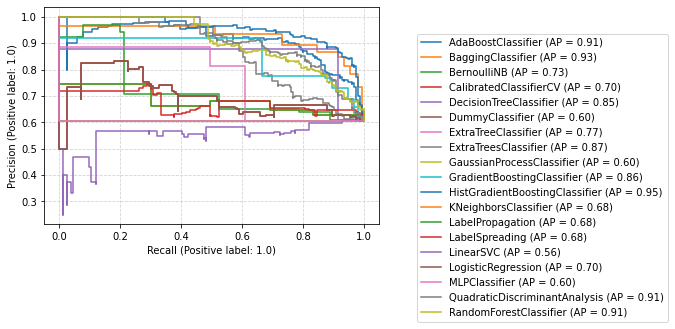

In [10]:
_ = exp.compare_precision_recall_curves(data[inputs].values, data[outputs].values)


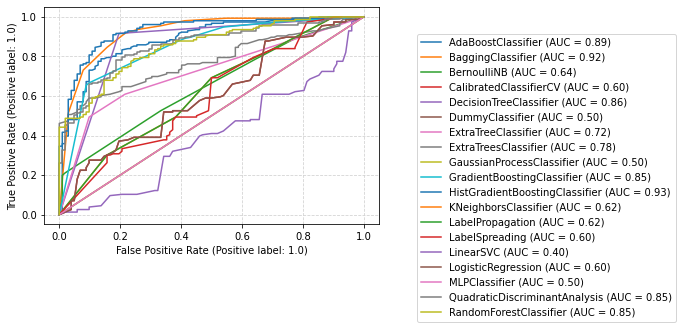

In [11]:
_ = exp.compare_roc_curves(data[inputs].values, data[outputs].values)
